<div align="center">
  <h1>Лабораторная работа №2</h1>
</div>

<div align="center">
  <h2>Отчет о выполнении</h2>
</div>

<div align="right">
  <h3>Студента 3 курса 8 группы</h3>
  <h3>Добрицкого Артема</h3>
</div>

<div align="center">
  <h2>Содержание</h2>
</div>

**Факторный анализ**


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import seaborn as sns

file = pd.read_csv("../data/Annual 2005-2011.csv")

display(file.head(10))
numeric_columns = file.select_dtypes(include=[np.number]).columns
data_numeric = file[numeric_columns]
data_clean = data_numeric.dropna()
chi_square_value, p_value = calculate_bartlett_sphericity(data_clean)


,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
0,6095.0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,...,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904,5.0
1,255.0,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,...,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647,5.0
2,114.0,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,...,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000,5.0
3,365.0,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,...,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295,0.312415,5.0
4,168.0,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,...,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726,0.011839,5.0
5,6969.0,4.200293,1.310167,2.355742,0.767058,0.067142,0.043515,0.001988,0.934306,14.222452,...,1.081892,0.958338,14.588270,13.651105,0.935759,84.654633,0.164268,0.140701,0.098621,5.0
6,1754.0,0.835976,0.008003,0.182230,-0.200464,0.488237,0.427889,0.090158,0.516995,2.298864,...,1.058383,0.989701,4.400794,9.688993,2.201647,6.725695,0.041624,0.035402,0.043877,5.0
7,146.0,4.096916,1.193833,1.823789,0.683871,0.036512,0.321678,0.271889,0.964689,37.013825,...,1.015167,0.519457,19.930876,30.244755,1.517483,22.763158,0.084162,0.037833,0.017057,5.0
8,1674.0,2.194307,0.112153,0.740924,0.554451,0.193730,0.023384,0.078174,0.810724,5.873536,...,1.001019,1.829401,13.253646,14.566474,1.099054,19.493671,0.060137,0.117208,0.091945,5.0
9,2455.0,1.215800,0.063003,0.413992,0.089936,0.341383,0.057987,0.041190,0.660346,4.521441,...,1.017691,1.188855,8.140185,10.115851,1.242705,27.631543,0.102509,0.088303,0.062603,5.0


In [29]:


print(f"\nтест бартлета:")
print(f"хи-квадрат: {chi_square_value:.3f}")

kmo_all, kmo_model = calculate_kmo(data_clean)
print(f"KMO: {kmo_model:.3f}")

if kmo_model >= 0.9:
    kmo_interpretation = "отличное"
elif kmo_model >= 0.8:
    kmo_interpretation = "хорошее"
elif kmo_model >= 0.7:
    kmo_interpretation = "удовлетворительное"
elif kmo_model >= 0.6:
    kmo_interpretation = "приемлемое"
else:
    kmo_interpretation = "неприемлемое"

print(f"Интерпретация: {kmo_interpretation} качество выборки")

print("\nВЫВОД ПО ПРИГОДНОСТИ ДАННЫХ:")
if p_value < 0.05 and kmo_model >= 0.6:
    print("✓ Использование факторного анализа ЦЕЛЕСООБРАЗНО")
    print("✓ Нулевая гипотеза об отсутствии корреляций ОТКЛОНЕНА")
else:
    print("✗ Использование факторного анализа НЕ ЦЕЛЕСООБРАЗНО")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)



тест бартлета:
хи-квадрат: 40874.337
KMO: 0.748
Интерпретация: удовлетворительное качество выборки

ВЫВОД ПО ПРИГОДНОСТИ ДАННЫХ:
✓ Использование факторного анализа ЦЕЛЕСООБРАЗНО
✓ Нулевая гипотеза об отсутствии корреляций ОТКЛОНЕНА


,Компонента,Собственное_значение,Дисперсия_%,Кумулятивная_%
0,1,5.359109,24.350546,24.350546
1,2,2.946609,13.388708,37.739254
2,3,1.990288,9.043405,46.782659
3,4,1.632581,7.418067,54.200726
4,5,1.298939,5.902079,60.102805
5,6,1.207523,5.486704,65.589509
6,7,1.088927,4.947830,70.537339
7,8,1.006261,4.572217,75.109556
8,9,0.854580,3.883012,78.992568
9,10,0.734280,3.336397,82.328965



Число компонент по критерию Кайзера: 8


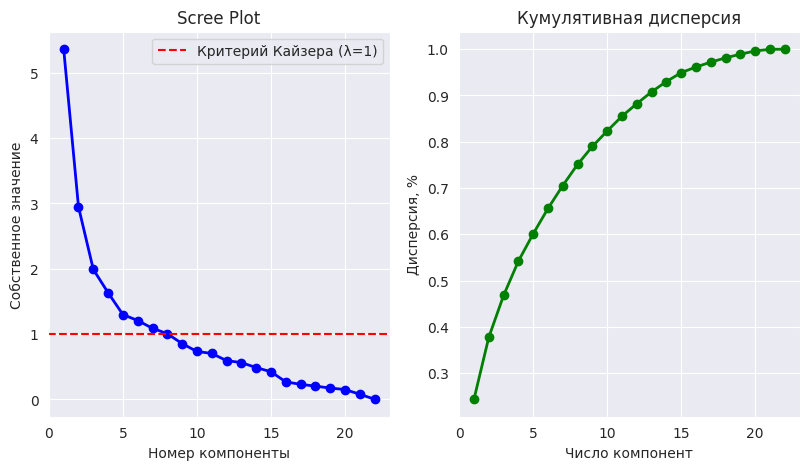

In [30]:


pca = PCA()
pca.fit(data_scaled)

eigenvalues = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

variance_table = pd.DataFrame({
    'Компонента': range(1, len(eigenvalues) + 1),
    'Собственное_значение': eigenvalues,
    'Дисперсия_%': explained_variance * 100,
    'Кумулятивная_%': cumulative_variance * 100
})
display(variance_table)
n_components_kaiser = sum(eigenvalues > 1)
print(f"\nЧисло компонент по критерию Кайзера: {n_components_kaiser}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', label='Критерий Кайзера (λ=1)')
plt.title('Scree Plot')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'go-', linewidth=2)
plt.title('Кумулятивная дисперсия')
plt.xlabel('Число компонент')
plt.ylabel('Дисперсия, %')
plt.grid(True)
plt.show()


На первом графике рядом с точкой где лямбда равно 1,видно небольшую 'коленку',по ней  можно определить количество компонент если не использовать критерий кмо

/home/zxcjabka/PycharmProjects/daefi/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Фактор_1,Фактор_2,Фактор_3,Фактор_4,Фактор_5,Фактор_6,Фактор_7,Фактор_8
empl_num,NaN,NaN,NaN,NaN,NaN,0.584,-0.401,NaN
k1,0.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k2,0.878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k3,0.916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
k4,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN
k5,NaN,NaN,NaN,NaN,-0.908,NaN,NaN,NaN
k6,NaN,NaN,NaN,NaN,NaN,-0.774,NaN,NaN
k7,NaN,NaN,NaN,NaN,NaN,-0.614,NaN,NaN
k8,NaN,NaN,NaN,NaN,0.911,NaN,NaN,NaN
k9,0.547,NaN,NaN,NaN,0.527,NaN,NaN,NaN


'матрица нагрузок (после вращения)'

,Фактор,Дисперсия_%,Кумулятивная_%
0,Фактор_1,3.251,0.148
1,Фактор_2,3.171,0.292
2,Фактор_3,1.592,0.364
3,Фактор_4,1.785,0.445
4,Фактор_5,2.733,0.570
5,Фактор_6,1.470,0.636
6,Фактор_7,1.501,0.705
7,Фактор_8,1.022,0.751


'объясненая дисперсия(после вращения):'

/home/zxcjabka/PycharmProjects/daefi/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



фактор 1 (объясняет 3.3% дисперсии):
k3    0.916
k1    0.895
k2    0.878
k9    0.547
Name: Фактор_1, dtype: float64

фактор 2 (объясняет 3.2% дисперсии):
k19    0.842
k20    0.818
k18    0.706
k4     0.625
k13    0.534
Name: Фактор_2, dtype: float64

фактор 3 (объясняет 1.6% дисперсии):
k16    0.845
k15    0.815
Name: Фактор_3, dtype: float64

фактор 4 (объясняет 1.8% дисперсии):
k12     0.803
year    0.694
k11     0.649
Name: Фактор_4, dtype: float64

фактор 5 (объясняет 2.7% дисперсии):
k8     0.911
k9     0.527
k10   -0.660
k5    -0.908
Name: Фактор_5, dtype: float64

фактор 6 (объясняет 1.5% дисперсии):
empl_num    0.584
k7         -0.614
k6         -0.774
Name: Фактор_6, dtype: float64

фактор 7 (объясняет 1.5% дисперсии):
k14    0.702
k13    0.657
Name: Фактор_7, dtype: float64

фактор 8 (объясняет 1.0% дисперсии):
k17    0.961
Name: Фактор_8, dtype: float64

Веса факторов для расчета:
Фактор 1: 0.197
Фактор 2: 0.192
Фактор 3: 0.096
Фактор 4: 0.108
Фактор 5: 0.165
Фактор 6: 0.08

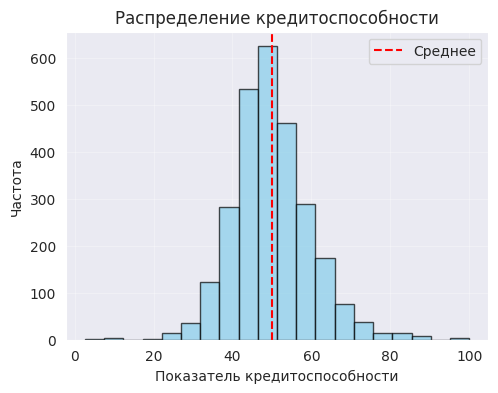

Исходные данные: (2695, 22)
Числовые переменные: 22
Наблюдения: 2695
KMO: 0.7484416972164825
Bartlett p-value: 0.0
Число факторов: 8
Объясненная дисперсия: 0.7510955624894852
Качество анализа: ВЫСОКОЕ

Главные компоненты объясняют 0.8% дисперсии исходных данных
Анализ завершен успешно!


In [31]:


optimal_factors = n_components_kaiser
fa = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax', method='principal')
fa.fit(data_scaled)

loadings_after = fa.loadings_

loadings_after_df = pd.DataFrame(
    loadings_after,
    index=data_clean.columns,
    columns=[f'Фактор_{i + 1}' for i in range(optimal_factors)]
)
significant_loadings = loadings_after_df[loadings_after_df.abs() > 0.4]
display(significant_loadings.round(3), "матрица нагрузок (после вращения)")

variance_after_rotation = fa.get_factor_variance()

variance_rotation_df = pd.DataFrame({
    'Фактор': [f'Фактор_{i + 1}' for i in range(optimal_factors)],
    'Дисперсия_%': variance_after_rotation[0],
    'Кумулятивная_%': variance_after_rotation[2]
})
display(variance_rotation_df.round(3), "объясненая дисперсия(после вращения):")
factor_threshold = 0.5
for i in range(optimal_factors):
    print(f"\nфактор {i + 1} (объясняет {variance_after_rotation[0][i]:.1f}% дисперсии):")
    high_loadings = loadings_after_df[loadings_after_df[f'Фактор_{i + 1}'].abs() > factor_threshold][f'Фактор_{i + 1}']
    if len(high_loadings) > 0:
        print(high_loadings.sort_values(ascending=False).round(3))
    else:
        print("Нет переменных с высокой нагрузкой")

factor_scores = fa.transform(data_scaled)
factor_scores_df = pd.DataFrame(
    factor_scores,
    columns=[f'Фактор_{i + 1}' for i in range(optimal_factors)],
    index=data_clean.index
)
weights = variance_after_rotation[0] / variance_after_rotation[0].sum()

print(f"\nВеса факторов для расчета:")
for i, weight in enumerate(weights):
    print(f"Фактор {i + 1}: {weight:.3f}")
credit_score = np.zeros(len(factor_scores_df))
for i in range(optimal_factors):
    credit_score += weights[i] * factor_scores_df[f'Фактор_{i + 1}']

credit_score_normalized = 50 + (credit_score - credit_score.mean()) / credit_score.std() * 10
credit_score_normalized = np.clip(credit_score_normalized, 0, 100)

results_df = data_clean.copy()
results_df['Кредитоспособность'] = credit_score_normalized
results_df['Кредитоспособность_сырая'] = credit_score

print(f"\nРЕЗУЛЬТАТЫ РАСЧЕТА КРЕДИТОСПОСОБНОСТИ:")
print(f"Средний показатель: {credit_score_normalized.mean():.2f}")
print(f"Стандартное отклонение: {credit_score_normalized.std():.2f}")
print(f"Минимальное значение: {credit_score_normalized.min():.2f}")
print(f"Максимальное значение: {credit_score_normalized.max():.2f}")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(credit_score_normalized, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(credit_score_normalized.mean(), color='red', linestyle='--', label='Среднее')
plt.xlabel('Показатель кредитоспособности')
plt.ylabel('Частота')
plt.title('Распределение кредитоспособности')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

results_summary = {
    'Исходные данные': file.shape,
    'Числовые переменные': data_clean.shape[1],
    'Наблюдения': data_clean.shape[0],
    'KMO': kmo_model,
    'Bartlett p-value': p_value,
    'Число факторов': optimal_factors,
    'Объясненная дисперсия': variance_after_rotation[2][-1],
    'Качество анализа': 'ВЫСОКОЕ' if kmo_model >= 0.7 and p_value < 0.05 else 'УДОВЛЕТВОРИТЕЛЬНОЕ'
}

for key, value in results_summary.items():
    print(f"{key}: {value}")

print(f"\nГлавные компоненты объясняют {variance_after_rotation[2][-1]:.1f}% дисперсии исходных данных")
print("Анализ завершен успешно!")

* Расчет кредитоспособности

In [32]:
weights = variance_after_rotation[0] / variance_after_rotation[0].sum()

print(f"\nВеса факторов для расчета:")
for i, weight in enumerate(weights):
    print(f"Фактор {i+1}: {weight:.3f}")


Веса факторов для расчета:
Фактор 1: 0.197
Фактор 2: 0.192
Фактор 3: 0.096
Фактор 4: 0.108
Фактор 5: 0.165
Фактор 6: 0.089
Фактор 7: 0.091
Фактор 8: 0.062



РЕЗУЛЬТАТЫ РАСЧЕТА КРЕДИТОСПОСОБНОСТИ:
Средний показатель: 49.99
Стандартное отклонение: 9.91
Минимальное значение: 2.60
Максимальное значение: 100.00


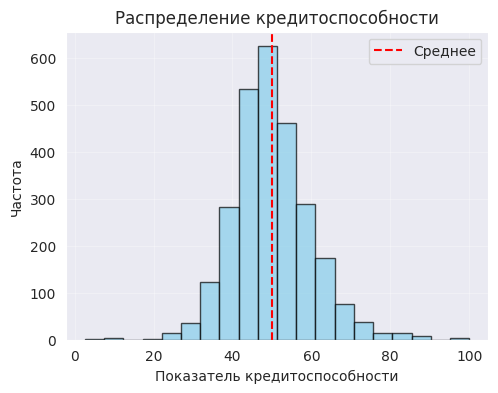

In [33]:
credit_score = np.zeros(len(factor_scores_df))
for i in range(optimal_factors):
    credit_score += weights[i] * factor_scores_df[f'Фактор_{i+1}']

credit_score_normalized = 50 + (credit_score - credit_score.mean()) / credit_score.std() * 10
credit_score_normalized = np.clip(credit_score_normalized, 0, 100)

results_df = data_clean.copy()
results_df['Кредитоспособность'] = credit_score_normalized
results_df['Кредитоспособность_сырая'] = credit_score

print(f"\nРЕЗУЛЬТАТЫ РАСЧЕТА КРЕДИТОСПОСОБНОСТИ:")
print(f"Средний показатель: {credit_score_normalized.mean():.2f}")
print(f"Стандартное отклонение: {credit_score_normalized.std():.2f}")
print(f"Минимальное значение: {credit_score_normalized.min():.2f}")
print(f"Максимальное значение: {credit_score_normalized.max():.2f}")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(credit_score_normalized, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(credit_score_normalized.mean(), color='red', linestyle='--', label='Среднее')
plt.xlabel('Показатель кредитоспособности')
plt.ylabel('Частота')
plt.title('Распределение кредитоспособности')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()
